In [15]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from MS_L_IDs import *
from ShowDF import *
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from AllMS2Data import *
from mzPeak import *
from mz_Gauss_std import *
from GaussianPeak import *

In [6]:
DataSetName='12111.mzML'

In [7]:
DataSet=ChargeDataSet(DataSetName)

In [11]:
MS1IDVec=MS_L_IDs(DataSet=DataSet,Level=1)

In [8]:
MS2IDVec=MS_L_IDs(DataSet=DataSet,Level=2) #I'm not really using this one 

In [10]:
SummMS2=AllMS2Data(DataSet=DataSet)

In [ ]:
from scipy.optimize import curve_fit
GaussianParameters=curve_fit(GaussianPeak, xdata=PeakData[:,0], ydata=PeakData[:,1],p0=[I_total,mz,mz_std])
print(GaussianParameters)

I_mean=np.mean(PeakData[:,1])
SS_tot=np.sum((PeakData[:,1]-I_mean)**2)
SS_res=np.sum((Gaussian_Int-PeakData[:,1])**2)

r2=1-SS_res/SS_tot

I_total=GaussianParameters[0][0]
mz=GaussianParameters[0][1]
mz_std=GaussianParameters[0][2]
GaussianPeak(mz_vec,I_total,mz,mz_std)

In [16]:
from scipy.optimize import curve_fit

141.00260925293


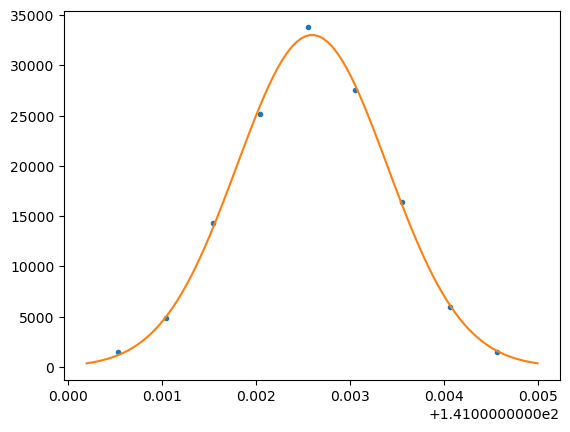

In [18]:


MS2_id=45

MS2_to_MS1_ratio=10
RT=SummMS2[MS2_id,1]
mz=SummMS2[MS2_id,0]
print(mz)
MS2_Fullsignal_id=SummMS2[MS2_id,2]
ID_filter=(MS1IDVec[:,0]<MS2_Fullsignal_id)&(MS1IDVec[:,0]>(MS2_Fullsignal_id-MS2_to_MS1_ratio)) #The MS2 is generated with the ions from the MS1, so the MS2 RT and id, would be higher
Earlier_MS1IDVec=MS1IDVec[ID_filter,:]
RT_DifVec=RT-Earlier_MS1IDVec[:,1]
Min_RT_Dif=np.min(RT_DifVec)
Closest_MS1_Loc=np.where(RT_DifVec==Min_RT_Dif)[0]
spectrum_id=Earlier_MS1IDVec[Closest_MS1_Loc,0]
PeakData=mzPeak(DataSet=DataSet,spectrum_id=spectrum_id,mz=mz,mz_std=2e-3,stdDistance=3,count=0,MaxCount=3,Points_for_regression=5,minSignals=7)
GaussStats=mz_Gauss_std(PeakData)
mz_vec=PeakData[:,0]
mz_std=GaussStats[1]
I_total=GaussStats[4]
Gaussian_Int=GaussianPeak(mz_vec=mz_vec,I_total=I_total,mz=mz,mz_std=mz_std)
#print(mz_Gauss(PeakData))
GaussianParameters=curve_fit(GaussianPeak, xdata=PeakData[:,0], ydata=PeakData[:,1],p0=[I_total,mz,mz_std])
I_total=GaussianParameters[0][0]
mz=GaussianParameters[0][1]
mz_std=GaussianParameters[0][2]
#plt.plot(PeakData[:,0],Gaussian_Int)
mz_vec=np.linspace(mz-3*mz_std,mz+3*mz_std,100)
Gaussian_Int=GaussianPeak(mz_vec,I_total,mz,mz_std)
    
plt.plot(PeakData[:,0],PeakData[:,1],'.')
plt.plot(mz_vec,Gaussian_Int)
plt.show()

In [ ]:

MS2_id=45
for MS2_id in np.arange(100,115,dtype='int'):
    MS2_to_MS1_ratio=10
    RT=SummMS2[MS2_id,1]
    mz=SummMS2[MS2_id,0]
    print(mz)
    MS2_Fullsignal_id=SummMS2[MS2_id,2]
    ID_filter=(MS1IDVec[:,0]<MS2_Fullsignal_id)&(MS1IDVec[:,0]>(MS2_Fullsignal_id-MS2_to_MS1_ratio)) #The MS2 is generated with the ions from the MS1, so the MS2 RT and id, would be higher
    Earlier_MS1IDVec=MS1IDVec[ID_filter,:]
    RT_DifVec=RT-Earlier_MS1IDVec[:,1]
    Min_RT_Dif=np.min(RT_DifVec)
    Closest_MS1_Loc=np.where(RT_DifVec==Min_RT_Dif)[0]
    spectrum_id=Earlier_MS1IDVec[Closest_MS1_Loc,0]
    PeakData=mzPeak(DataSet=DataSet,spectrum_id=spectrum_id,mz=mz,mz_std=2e-3,stdDistance=3,count=0,MaxCount=3,Points_for_regression=5,minSignals=7)
    #print(mz_Gauss(PeakData))
    
    plt.plot(PeakData[:,0],PeakData[:,1],'.')
    plt.show()

In [ ]:
from scipy import stats
def Weight_mz_stats(PeakData,minSignals=5):
    maxInt=np.max(PeakData[:,1])
    maxInt_Loc=np.where(PeakData[:,1]==maxInt)[0]
    mz_maxInt=PeakData[maxInt_Loc,0]
    mz_DifVec=np.abs(PeakData[:,0]-mz_maxInt)
    PeakData=PeakData[mz_DifVec.argsort(),:]
    Closest_PeakData=PeakData[1:(minSignals+1),:]
    log_Int_Vec=np.log(Closest_PeakData[:,1]/maxInt)
    Variance_mz_vec=(Closest_PeakData[:,0]-mz_maxInt)**2
    X=log_Int_Vec
    Y=Variance_mz_vec
    reg=stats.linregress(X,Y)
    m=reg[0]
    b=reg[1]
    r2=reg[2]**2
    #print(np.sqrt(-m/2),b,r2)
    PeakStats=[mz,mz_std,Nsignals,ConfidenceIntervalDa,ConfidenceInterval,r2,I_total,MaxInt,min_mz3std,max_mz3std]      
    return PeakStats

In [ ]:
maxIntVec=[]
RTVec=[]
#peak=SpectraPeaks[peak_id,:]
mz=268.190621
std=1e-3
min_mz=mz-std
max_mz=mz+std
for spectrum_id in MS1IDVec:
    spectrum=DataSet[int(spectrum_id)]
    RawSpectrum=np.array(spectrum.get_peaks()).T
    LittleSpecFil=(RawSpectrum[:,0]>min_mz)&(RawSpectrum[:,0]<max_mz)
    LittleSpec=RawSpectrum[LittleSpecFil,:]
    if len(LittleSpec)>0:
        maxInt=np.max(LittleSpec[:,1])            
        RT=spectrum.getRT()
        maxIntVec.append(maxInt)
        RTVec.append(RT)
maxInt=np.max(maxIntVec)
RTLoc=int(np.where(np.array(maxIntVec)==maxInt)[0][0])
plt.xlim([135,160])
plt.plot(RTVec,maxIntVec,'.')
plt.show()